### Setting up the work enviroment

In [1]:
from sympy import (symbols, pi, I, E, cos, sin, exp, tan, simplify, expand, factor, collect,
                   apart, cancel, expand_trig, diff, Derivative, Function, integrate, limit,
                   series, Eq, solve, dsolve, Matrix, N, preorder_traversal, Float, solve_linear_system,
                   eye, zeros, lambdify)
from sympy.physics.mechanics import dynamicsymbols, init_vprinting

In [2]:
from scipy.special import roots_jacobi

In [3]:
init_vprinting()

In [4]:
x, xi = symbols('x xi')

In [5]:
def x_roots(n):
    return roots_jacobi(n+1, 1, 0)[0]
def element(x, xm, xj):
    return (x-xm)/(xj-xm)

def L_pol(j,k):
    prod = 1
    #x_list = symbols(f'x_0:{k+1}')
    x_list = x_roots(k)
    for m in range(k+1):
        if m != j:
            prod *= element(x, x_list[m], x_list[j])
    return expand(prod) 

def L_pol_sym(j,k):
    prod = 1
    x_list = symbols(f'x_0:{k+1}')
    #x_list = x_roots(k)
    for m in range(k+1):
        if m != j:
            prod *= element(x, x_list[m], x_list[j])
    return expand(prod) 

def lagpol(n):
    sumat = 0
    q_list = symbols(f'f_0:{n+2}')
    for ii in range(n+1):
        sumat += L_pol(ii, n)*q_list[ii]
    return sumat

def lagpol_sym(n):
    sumat = 0
    q_list = symbols(f'f_0:{n+2}')
    for ii in range(n+1):
        sumat += L_pol_sym(ii, n)*q_list[ii]
    return sumat

def abcpol(n):
    abc = symbols(f'a b c d e f g h i j k l m n o p q r s t u v w a_0:{max(0,n-22)}')
    sumat = 0
    for ii in range(n+1):
        sumat += abc[ii]*x**ii
    return sumat

def lagpol_abc(n):
    sumat = 0
    x_list = x_roots(n)
    abc = abcpol(2*n-1)
    q_list = [abc.subs(x, x_list[ii]) for ii in range(n+1)]
    for ii in range(n+1):
        sumat += L_pol(ii, n)*q_list[ii]
    return sumat

## Theory

We want to use a polynomial approximation $\psi(x)$ of $f(x)$ so that:

$$\int_{-1}^1 \int_{-1}^{\xi}f(x)\text{ }dx \text{ }d\xi \approx \int_{-1}^1 \int_{-1}^{\xi}\psi(x)\text{ }dx \text{ }d\xi$$

The polynomial $\psi(x)$ has degree $n-1$ and is equal to $f(x)$ at $n$ points $x_i$. Therefore can be expressed as a sum of lagrange polynomials:

$$\psi(x) = \sum_{i=0}^{n-1} f(x_i) L_i^{n-1}(x)$$

If we define $S_i^n$ as $\int_{-1}^1 \int_{-1}^{\xi}L_i^n(x)\text{ }dx \text{ }d\xi$ :

$$\int_{-1}^1 \int_{-1}^{\xi}f(x)\text{ }dx \text{ }d\xi \approx \int_{-1}^1 \int_{-1}^{\xi}\sum_{i=0}^{n-1} f(x_i) L_i^{n-1}(x)\text{ }dx \text{ }d\xi =\sum_{i=0}^{n-1} S_i^{n-1} f(x_i)$$

Therefore, finding the best points $x_i$ is the same problem as finding the best quadrature: 
$$\int_{-1}^1 \int_{-1}^{\xi}f(x)\text{ }dx \text{ }d\xi \approx\sum_{i=0}^{n-1}w_if(x_i).$$

Using integration by parts we get:
$$\begin{align}
\int_{-1}^1 \int_{-1}^{\xi}f(t)\mathrm dt \mathrm d\xi &=\left[\xi \int_{-1}^{\xi}f(t)\mathrm dt\right]_{-1}^1 - \int_{-1}^1 \xi f(\xi)\mathrm d\xi\\
&= \int_{-1}^1 (1-\xi)f(\xi)\mathrm d\xi\\
&\approx \sum_{i=0}^{n-1} w_if(x_i)
\end{align}$$

Which can be treated using a [Gauss-Jacobi Quadrature](https://www.wikiwand.com/en/Gauss%E2%80%93Jacobi_quadrature) with $\alpha = 1$, $\beta = 0$, where the $x_i$ are then the roots of the corresponding Jacobi Polynomial.

## Example: n = 2

With n=2, we can approximate a polynomial of degree 2n-1 = 3 with a polynomial of degree n-1 = 1

$$ f(x) = a + b x + c x^{2} + d x^{3}$$
$$\psi(x) = f_0 L_0^1  + f_1 L_1^1$$

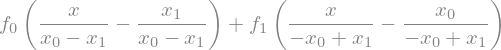

In [6]:
psi = lagpol_sym(1)
psi

In [7]:
f = abcpol(3)
f

Calculating the integrals:

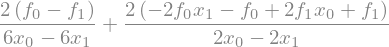

In [8]:
psi_ii = integrate(integrate(psi, (x, -1, xi)), (xi, -1, 1))
psi_ii

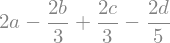

In [9]:
f_ii = integrate(integrate(f, (x, -1, xi)), (xi, -1, 1))
f_ii

We can substitute $f_0$ and $f_1$ by the values of $f(x_0)$ and $f(x_1)$ on the integrated expression of $\psi$:

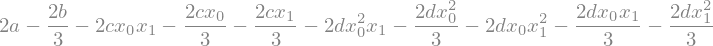

In [10]:
psi_ii = simplify(psi_ii.subs((
    [symbols('f_0'), f.subs(x, symbols('x_0'))],
    [symbols('f_1'), f.subs(x, symbols('x_1'))]
)))
psi_ii

By choosing the correct $x_i$, we are able to make both integrals have the same value for any value of $a, b, c$ and $d$.
In this case, the roots of the jacobi polynomial are:

In [11]:
roots_jacobi(2, 1, 0)[0]

array([-0.68989795,  0.28989795])

If we use them as the values of $x_i$:

In [12]:
psi_ii_num = simplify(psi_ii.subs((
    [symbols('x_0'), roots_jacobi(2, 1, 0)[0][0]],
    [symbols('x_1'), roots_jacobi(2, 1, 0)[0][1]]
)))
psi_ii_num

We can observe that we obtain the same value as the integral of $f(x)$, up to numerical accuracy:

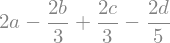

In [13]:
f_ii

### Higher Order

We can observe that we can approximate polynomials of degree 2n-1 exactly up to numerical accuracy

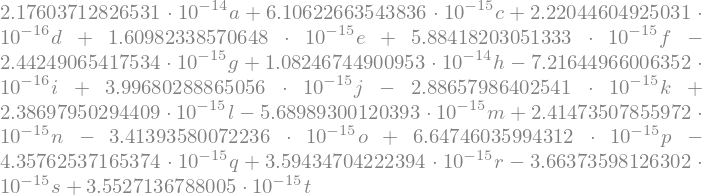

In [14]:
n = 10

f_new = abcpol(2*n-1)
psi_new = lagpol_abc(n)

f_new_ii = integrate(integrate(f_new, (x, -1, xi)), (xi, -1, 1))
psi_new_ii = integrate(integrate(psi_new, (x, -1, xi)), (xi, -1, 1))

f_new_ii-psi_new_ii

In [15]:
from sympy import jacobi_poly

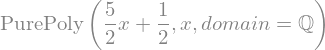

In [19]:
_j = jacobi_poly(1,2,1, polys=True)
_j

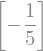

In [21]:
_j.real_roots()